# Visual Representation of a Bivariate Gaussian
> This post depicts various methods of visulalizing the bivariate normal distribution using matplotlib and GeoGebra.


- toc: true 
- badges: true
- comments: true
- categories: ['bivariate','normal','mean vector','covariance', 'Geogebra']
- author : Anand Khandekar
- image: images/bivariate.jpg

# Dependencies

In [31]:
#collapse-show
%matplotlib inline

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

# MultiVariate Normal distribution
Real world datasets are seldom univariate. Infact they are often multi variate with large dimensions. Each of these dimensions, also referred to as features, ( columns in a spread sheet) may or maynot be corellated to each other.

 In particular, we are interested in the multivariate case of this distribution, where each random variable is distributed normally and their joint distribution is also Gaussian. The multivariate Gaussian distribution is defined by a mean vector $\mu$ and a covariance matrix $\Sigma$.


The mean vector $\mu$ describes the expected value of the distribution. Each of its components describes the mean of the corresponding dimension. $\Sigma$ models the variance along each dimension and determines how the different random variables are correlated. The covariance matrix is always symmetric and positive semi-definite. The diagonal of $\Sigma$ consists of the variance $\sigma_i^2$  of the $i$-th random variable. And the off-diagonal elements $\sigma_{ij}$ describe the correlation between the $i$-th and the $j$-th random variable.
​	   $$X = \begin{bmatrix} X_1 \\ X_2 \\ . \\ .\\ X_n \end{bmatrix} \sim \mathcal{N}(\mathbf{\mu}, \Sigma) $$

Wee say that $X$ follows a  normal distribution. The covariance $\Sigma$ describs the shape of the distribution. It is defined in terms of the expected value $\mathbb{E}$ :
$$ \Sigma = Cov( X_i, X_j) = \mathbb{E}[ ( X_i-\mu_i) (X_i - \mu_j)^T]$$





​	

Let us consider a multi variate normmal random variable $x$ of dimensionality $d$ i.e $d$ numberof features or columns. Then the [joint probability](https://en.wikipedia.org/wiki/Joint_probability_distribution) densit is given by :
$$p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}$$

where $ \textbf{x}$ a random sized vector of size $d$, $\textbf{$\mu$}$ is the mean vector, $\Sigma$ is the ( [symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix) , [positive definite](https://en.wikipedia.org/wiki/Positive-definite_matrix) ) covariance matrix ( of size $d\times d$ ), and $\lvert\Sigma\rvert$ its [determinant](https://en.wikipedia.org/wiki/Determinant).

We denote the multivariate nornal distribution as  : $$\mathcal{N}(\mathbf{\mu}, \Sigma)$$
The mean vector $\mathbf{\mu}$, is the expected value of the distribution; and the [covariance](https://en.wikipedia.org/wiki/Covariance) matrix $\Sigma$, which measures how dependent any two random varibales are and how they change with each other.


# custom defined multivariate normal distribution function.
this CODE can be skipped and w can always fall back on Numpy or Scipy who provide in built functions to do the same. But then, who does that ?

In [27]:
#collapse-show
def multivariate_normal(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

# Bivariate normal distribution

Let us consider a r.v with two dimensions $x_1$ and $x_2$ with the covariance between them set to $0$ so that the two are independent : Also, for the sake of siplicity, let us assume a $0$ mean along both the dimensions. 
$$\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)$$

he figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be other than $0$ so that both the variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase.
$$\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)$$

#  Helper function to generate density surface

In [28]:
#collapse-show
def generate_surface(mean, covariance, d):
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

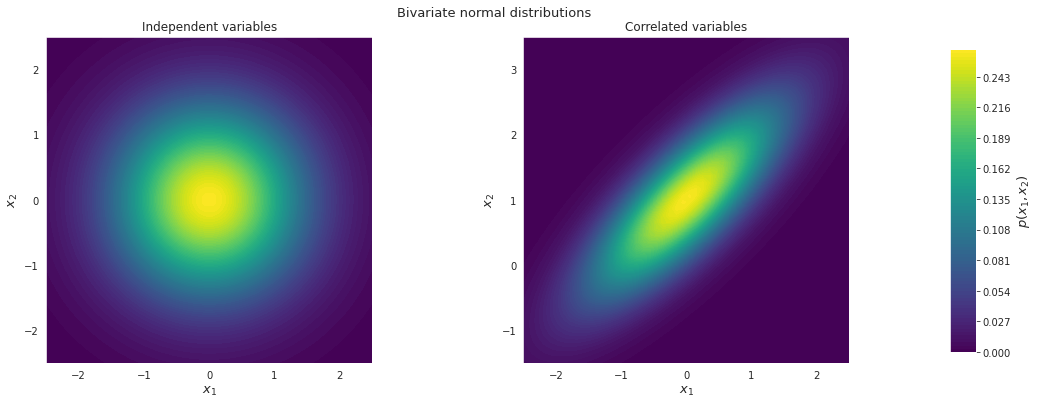

In [29]:
#collapse-show
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.viridis)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.viridis)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle("Bivariate normal distributions ", fontsize=13, y=0.95)
plt.show()

# Mean vector and Covariance Matrices
The Gaussian on the LHS
$$\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0& 1
\end{bmatrix}\right)$$



The gaussian on the RHS
$$\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)$$


# Surface plot in Matplot Lib

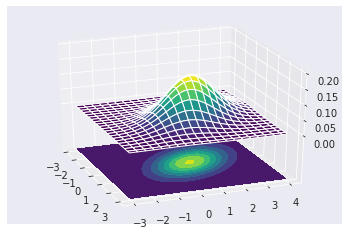

In [32]:
#collapse-show
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

# Visualize using GEOGEBRA

This is an open source tool that I have utilized in order to visualize the 2D Normal Distribution. Move the sliders available to change the values of the correlation, mean and the variances to see the effect on the shape. The z dimension depicts the 2D distribution.

[Anand Khandekar on Geogebra](https://www.geogebra.org/m/addudwg6)